Limpeza e Tratamento dos dados de uma instituição financeira para a posterior criação de um modelo de churn análise.

Regras do négocio:
1) O banco atende apenas aos estados da região sul do Brasil;
2) Os clientes devem ter no mínimo 18 anos para terem uma conta no banco;

In [40]:
#Primeiro importação de bibliotecas necessárias

import pandas as pd
import seaborn as sbn
import statistics as sts
import matplotlib.pyplot as plt

In [12]:
#Segundo paso importação do conjunto de dados e visualização

dataset = pd.read_csv("base_de_dados/churn.csv", sep=";")
dataset.head() #Com o método head() conseguimos visualizar o cabeçalho do dataset

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Como primeiro problema (ou não) temos os nomes das colunas da tabela que não transmitem sentido algum.

In [16]:
dataset.shape #Verificando o tamanho do conjunto de dados "tupla(quantidade_linhas, quantidade_colunas)"

(999, 12)

In [20]:
#Renomeando as colunas

dataset.columns = ["id", "Score", "Estado", "Gênero", "Idade", "Patrimônio", "Saldo em Conta",
                   "Quantidade de Produtos do Branco Que Usa", "Tem Cartão de Crédito", "Conta Ativa",
                   "Salário Anual", "Saiu"]

dataset.head()

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo em Conta,Quantidade de Produtos do Branco Que Usa,Tem Cartão de Crédito,Conta Ativa,Salário Anual,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Análise exploratoria dos dados para colhecer os dados e detectar problemas nos dados

In [22]:
#Estado

agrupamento = dataset.groupby(["Estado"]).size()
agrupamento

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

Temos estados fora do domínio do negócio (SP) e siglas para estados que nem existem (RP, TD). A moda é o estado RS.

<Axes: xlabel='Estado'>

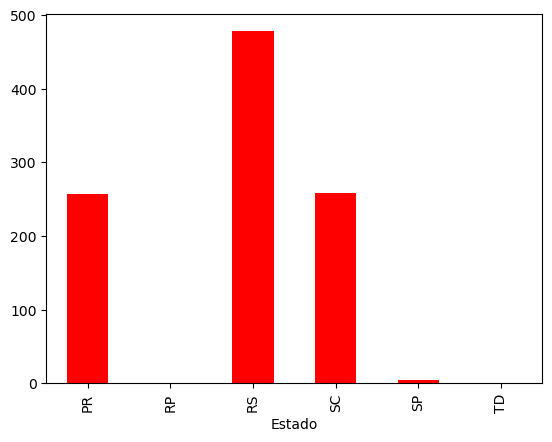

In [26]:
agrupamento.plot.bar(color = "red")

In [28]:
#Gênero

agrupamento = dataset.groupby(["Gênero"]).size()
agrupamento

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Na coluna Gênero o problema é pela não existência de uma padronização para os dados visto que F, Fem e Feminino são a mesma coisa assim como M e Masculino também são a mesma coisa. Masculino é a moda.

<Axes: xlabel='Gênero'>

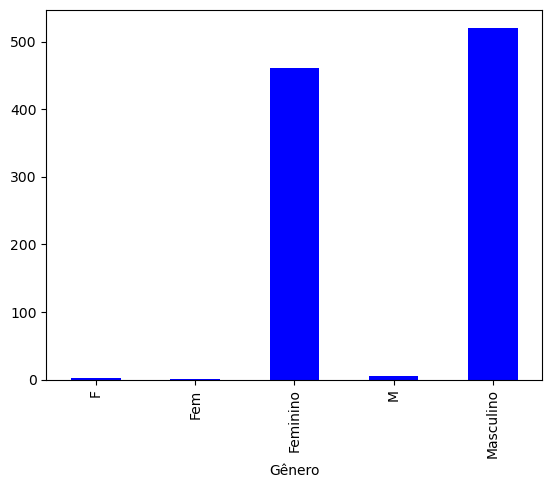

In [30]:
agrupamento.plot.bar(color = "blue")

In [34]:
#Score

dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

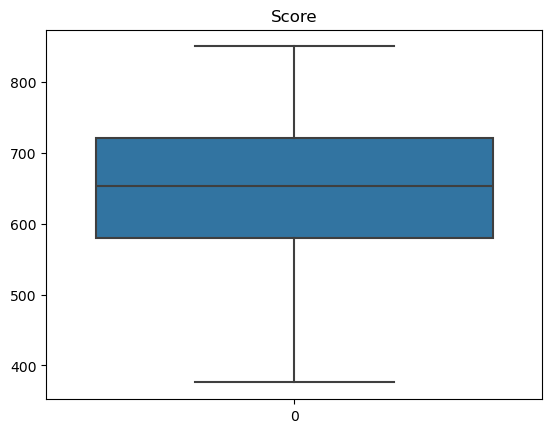

In [37]:
sbn.boxplot(dataset["Score"]).set_title("Score")

/home/diogo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


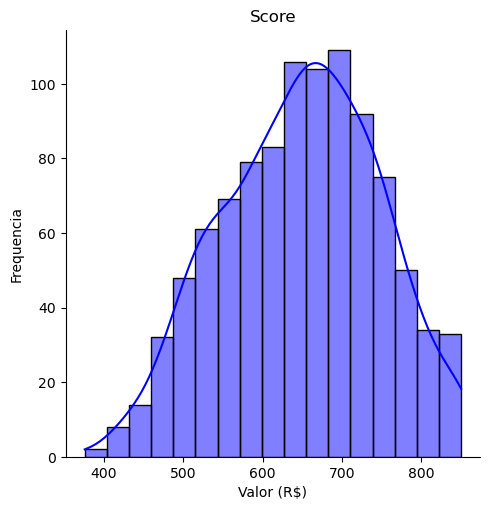

In [45]:
sbn.displot(dataset["Score"], kind="hist", kde="True", color="blue")

plt.title("Score")
plt.xlabel("Valor (R$)")
plt.ylabel("Frequencia")
plt.show()

Aparentemente os dados da coluna Score não apresentão problemas

In [47]:
#Idade

dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Na coluna Idade é possível perceber que o min (menor valor) é -20 o que foge da regra de negocio visto que os clientes do banco devem ter pelo menos 18 anos. Como maior valor temos 140 anos o que pode ser um erro também.

Text(0.5, 1.0, 'Idade')

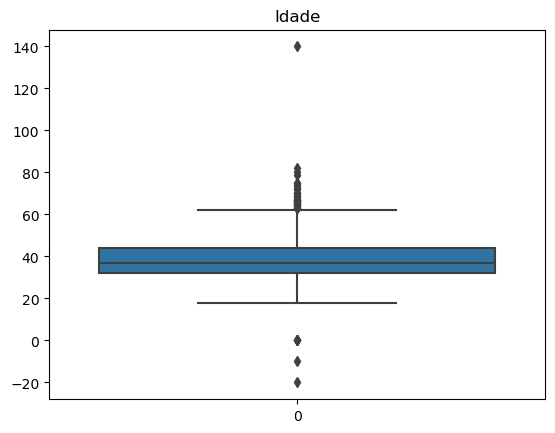

In [51]:
sbn.boxplot(dataset["Idade"]).set_title("Idade")

/home/diogo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


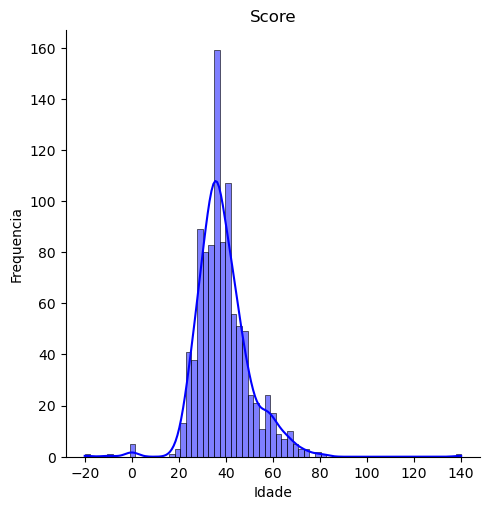

In [54]:
sbn.displot(dataset["Idade"], kind="hist", kde="True", color="blue")

plt.title("Score")
plt.xlabel("Idade")
plt.ylabel("Frequencia")
plt.show()

In [57]:
#Saldo em Conta

dataset["Saldo em Conta"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo em Conta, dtype: float64

Text(0.5, 1.0, 'Saldo em Conta')

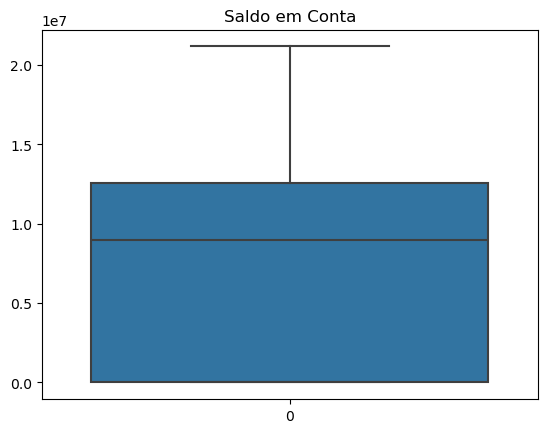

In [61]:
sbn.boxplot(dataset["Saldo em Conta"]).set_title("Saldo em Conta")

/home/diogo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


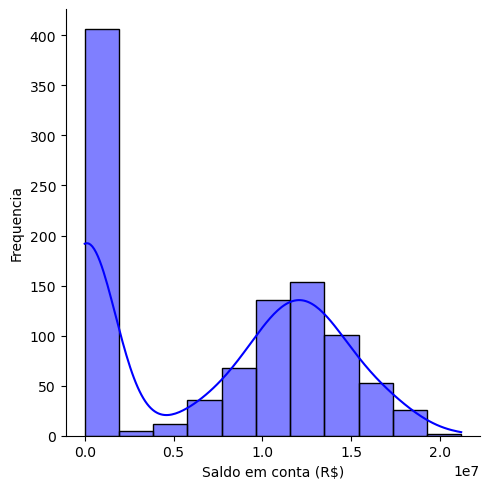

In [66]:
sbn.displot(dataset["Saldo em Conta"], kind="hist", kde="True", color="blue")
plt.xlabel("Saldo em conta (R$)")
plt.ylabel("Frequencia")
plt.show()

Uma grande quantidade de contas tem saldo igual a zero

In [68]:
dataset["Salário Anual"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário Anual, dtype: float64

Text(0.5, 1.0, 'Salário Anual')

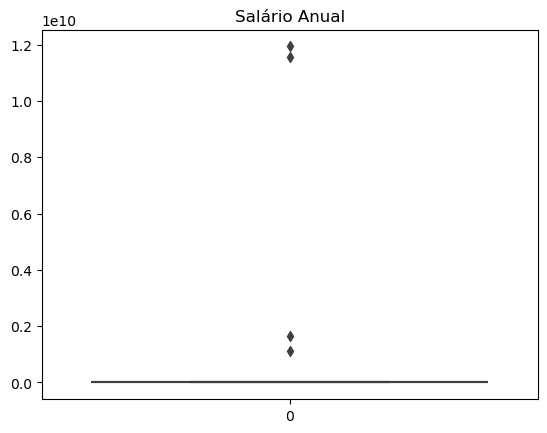

In [70]:
sbn.boxplot(dataset["Salário Anual"]).set_title("Salário Anual")

/home/diogo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


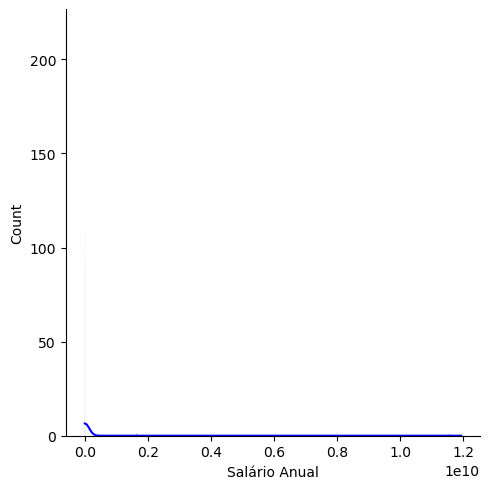

In [75]:
sbn.displot(dataset["Salário Anual"], kind="hist", kde="True", color="blue")

In [77]:
#Verificando se há valores NaN

dataset.isnull().sum()

id                                          0
Score                                       0
Estado                                      0
Gênero                                      8
Idade                                       0
Patrimônio                                  0
Saldo em Conta                              0
Quantidade de Produtos do Branco Que Usa    0
Tem Cartão de Crédito                       0
Conta Ativa                                 0
Salário Anual                               7
Saiu                                        0
dtype: int64

Na coluna Gênero temos 8 valores não informados e na coluna Salário Anual 7.

In [97]:
#Verificando a existência de valores duplicados

dataset[dataset.duplicated(["id"], keep=False)]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo em Conta,Quantidade de Produtos do Branco Que Usa,Tem Cartão de Crédito,Conta Ativa,Salário Anual,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


Tratamento dos dados

In [81]:
#Eliminar valores NaN na coluna Salário Anual

mediana = sts.median(dataset["Salário Anual"])
mediana

70518.0

In [83]:
dataset["Salário Anual"].fillna(mediana, inplace=True) #Colocando no lugar dos valores NaN a mediana da coluna
dataset["Salário Anual"].isnull().sum() #Verificando se ainda existem valores NaN na coluna

0

In [85]:
#Gênero tem valores NaN e dados não padronizados

dataset["Gênero"].fillna("Masculino", inplace=True) #Colocando no lugar dos valores NaN masculino que é a moda da coluna
dataset["Gênero"].isnull().sum() #Verificando se ainda existem valores NaN

0

In [87]:
dataset.loc[dataset["Gênero"] == "M", "Gênero"] = "Masculino"
dataset.loc[dataset["Gênero"].isin(["F", "Fem"]), "Gênero"] = "Feminino"
agrupamento = dataset.groupby(["Gênero"]).size()
agrupamento

Gênero
Feminino     464
Masculino    535
dtype: int64

In [91]:
#Idade tendo valores menores que 18 anos que é a idade mínima e idades muito elevadas

dataset.loc[(dataset["Idade"] < 18) | (dataset["Idade"] > 120)]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo em Conta,Quantidade de Produtos do Branco Que Usa,Tem Cartão de Crédito,Conta Ativa,Salário Anual,Saiu
851,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677.0,1
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
887,889,585,RS,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,0,5,11859041,1,1,1,568417.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [93]:
mediana = sts.median(dataset["Idade"])
mediana

37

In [95]:
#Colocando no lugar das idades erradas a mediana da coluna Idade
dataset.loc[(dataset["Idade"] < 18) | (dataset["Idade"] > 120), "Idade"] = mediana
#Verificando se ainda existem valores errados
dataset.loc[(dataset["Idade"] < 18) | (dataset["Idade"] > 120)]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo em Conta,Quantidade de Produtos do Branco Que Usa,Tem Cartão de Crédito,Conta Ativa,Salário Anual,Saiu


In [102]:
#Estados fora do domínio, serão substituidos pela moda

dataset.loc[dataset["Estado"].isin(["RP", "SP", "TD"]), "Estado"] = "RS"
agrupamento = dataset.groupby(["Estado"]).size()
agrupamento

Estado
PR    257
RS    484
SC    258
dtype: int64

In [104]:
#Salário Anual 

desvio_padrao = sts.stdev(dataset["Salário Anual"])
desvio_padrao

528724131.43461967

In [106]:
dataset.loc[dataset["Salário Anual"] >= 2 * desvio_padrao]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo em Conta,Quantidade de Produtos do Branco Que Usa,Tem Cartão de Crédito,Conta Ativa,Salário Anual,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [110]:
mediana = sts.median(dataset["Salário Anual"])
mediana

8641028.0

In [116]:
dataset.loc[dataset["Salário Anual"] >= 2 * desvio_padrao, "Salário Anual"] = mediana
dataset.loc[dataset["Salário Anual"] >= 2 * desvio_padrao]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo em Conta,Quantidade de Produtos do Branco Que Usa,Tem Cartão de Crédito,Conta Ativa,Salário Anual,Saiu


In [119]:
#Dados duplicados

dataset.drop_duplicates(subset="id", keep="first", inplace=True)
dataset[dataset.duplicated(["id"], keep=False)]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo em Conta,Quantidade de Produtos do Branco Que Usa,Tem Cartão de Crédito,Conta Ativa,Salário Anual,Saiu


In [121]:
dataset.head(50)

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo em Conta,Quantidade de Produtos do Branco Que Usa,Tem Cartão de Crédito,Conta Ativa,Salário Anual,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671.0,1
6,7,822,RS,Masculino,50,7,0,2,1,1,100628.0,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,8641028.0,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,749405.0,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7172573.0,0


In [123]:
dataset.shape

(998, 12)